## Import

In [111]:
import pandas as pd

# load data set
df = pd.read_csv('../data/fbref/player_stats.csv')

df.head(2)

,unique_id,Season,League,Team,Player,Nation,Pos,Global Pos,Age,Matches Played,...,Playing Time_Mn/MP,Starts,Mn/Start,Compl,Subs,unSub,PPM,onG,onGA,On-Off
0,Ederson_2022-2023_EPL_Manchester City,2022-2023,EPL,Manchester City,Ederson,BRA,GK,GK,28.0,35.0,...,90.0,35.0,90.0,35.0,0.0,3.0,2.34,89.0,32.0,0.30
1,Rodri_2022-2023_EPL_Manchester City,2022-2023,EPL,Manchester City,Rodri,ESP,MF,MF,26.0,36.0,...,81.0,34.0,85.0,23.0,2.0,1.0,2.39,83.0,26.0,1.06


## Introduction
In this section, the goal is to construct a high-dimensional player profile. The aim is to identify the most meaningful and promising attributes that best describe the player's characteristics.

When dealing with ratios, such as pass accuracy, the objective is to convert them to absolute numbers to capture their magnitude. Ratios are generally not retained as they may introduce redundancy.

### Stats by 90 minutes

In [112]:
# TODO: Reconstruct 90s. It was dropped
# df['TCD_90_min'] = df['90s'] / df['Total_TotDist']

### Vision,  Work Rate, ...

In [113]:
columns_for_vision = ['Progressive Passes', 'Passes_to_Penalt_Area', 'Passes_to_1/3', 'Crosses_into_Penalty_Area', 'SCA Types_PassLive']
df['Vision'] = df[columns_for_vision].sum(axis=1) / len(columns_for_vision)
df['Vision']

0         3.0
1       128.2
2        28.6
3       121.4
4        84.0
        ...  
4798      0.0
4799      0.0
4800      0.0
4801      0.0
4802      0.0
Name: Vision, Length: 4803, dtype: float64

In [114]:
columns_for_intensity= ['Total_TotDist']

In [115]:
columns_for_work_rate = ['Tackles_Att','Dribblers_Tkl_Att','Dribblers_Tkl_Lost','Blocks_Total','Interceptions','Recov',
                         'Aerial Duels_Won', 'Aerial Duels_Lost', 'Fls']
df['Work_Rate'] = df[columns_for_work_rate].sum(axis=1) / len(columns_for_work_rate)

<Axes: xlabel='Work_Rate', ylabel='Vision'>

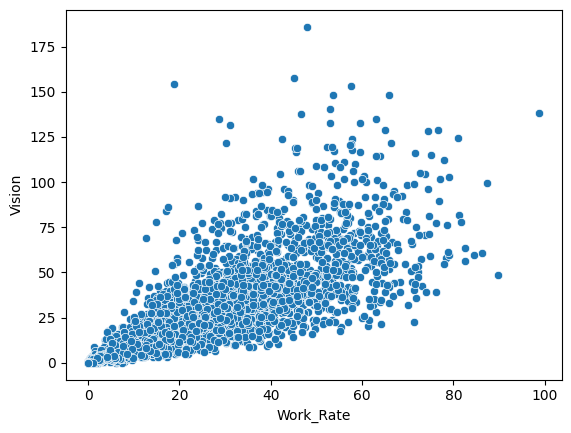

In [116]:
import seaborn as sns

sns.scatterplot(data=df, x='Work_Rate',y='Vision')

Calculate quantiles

In [117]:
leagues = df['League'].unique()
league_dfs = {}
for league in leagues:
    df_temp = df.copy()
    df_temp = df[df['League'] == league]
    df_temp['wr_q'] = df_temp['Work_Rate'].rank(pct=True)
    df_temp['v_q'] = df_temp['Vision'].rank(pct=True)

    league_dfs[league] = df_temp

C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_27100\1189678284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['wr_q'] = df_temp['Work_Rate'].rank(pct=True)
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_27100\1189678284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['v_q'] = df_temp['Vision'].rank(pct=True)
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_27100\1189678284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Top 90% Work Rate in EPL

In [122]:
epl_df = league_dfs['EPL']
epl_df = epl_df[epl_df['wr_q'] > .90]
epl_df[['League','Team','Player','Global Pos','wr_q','Work_Rate']].sort_values('wr_q',ascending=False)

,League,Team,Player,Global Pos,wr_q,Work_Rate
311,EPL,Fulham,João Palhinha,MF,1.000000,89.777778
104,EPL,Newcastle Utd,Kieran Trippier,DF,0.998617,76.555556
461,EPL,West Ham,Declan Rice,MF,0.997234,75.111111
1,EPL,Manchester City,Rodri,MF,0.995851,74.444444
173,EPL,Brighton,Moisés Caicedo,MF,0.994467,73.888889
...,...,...,...,...,...,...
314,EPL,Fulham,Tim Ream,DF,0.905947,50.111111
691,EPL,Southampton,Mohammed Salisu,DF,0.904564,49.666667
542,EPL,Nott'ham Forest,Neco Williams,DF,0.903181,49.555556
283,EPL,Brentford,Ethan Pinnock,DF,0.901798,49.333333


Top 90% Work Rate in Bundesliga

In [119]:
buli_df = league_dfs['Bundesliga']
buli_df = buli_df[buli_df['wr_q'] > .90]
buli_df[['League','Team','Player','Global Pos','wr_q','Work_Rate']].sort_values('wr_q',ascending=False)

,League,Team,Player,Global Pos,wr_q,Work_Rate
1038,Bundesliga,Köln,Jonas Hector,DF,1.000000,78.333333
1138,Bundesliga,Bochum,Anthony Losilla,MF,0.998331,76.222222
1209,Bundesliga,Stuttgart,Wataru Endo,MF,0.996661,74.555556
1245,Bundesliga,Schalke 04,Tom Krauß,MF,0.994992,74.000000
849,Bundesliga,Freiburg,Nicolas Höfler,MF,0.993322,72.333333
1286,Bundesliga,Hertha BSC,Lucas Tousart,MF,0.991653,71.666667
1037,Bundesliga,Köln,Ellyes Skhiri,MF,0.989983,71.000000
1041,Bundesliga,Köln,Timo Hübers,DF,0.988314,70.000000
1110,Bundesliga,Werder Bremen,Marco Friedl,DF,0.986644,69.444444
912,Bundesliga,Eint Frankfurt,Tuta,DF,0.984975,68.333333


Top 90% Vision in EPL

In [120]:
epl_df = league_dfs['EPL']
epl_df = epl_df[epl_df['v_q'] > .90]
epl_df[['League','Team','Player','Global Pos','v_q','Vision']].sort_values('v_q',ascending=False)

,League,Team,Player,Global Pos,v_q,Vision
68,EPL,Manchester Utd,Bruno Fernandes,MF,1.000000,134.8
138,EPL,Liverpool,Trent Alexander-Arnold,DF,0.998617,133.0
104,EPL,Newcastle Utd,Kieran Trippier,DF,0.997234,128.8
1,EPL,Manchester City,Rodri,MF,0.995851,128.2
35,EPL,Arsenal,Martin Ødegaard,MF,0.994467,123.8
...,...,...,...,...,...,...
148,EPL,Liverpool,Thiago Alcántara,MF,0.905947,56.8
279,EPL,Brentford,Rico Henry,DF,0.903181,56.4
347,EPL,Crystal Palace,Marc Guéhi,DF,0.903181,56.4
5,EPL,Manchester City,Manuel Akanji,DF,0.903181,56.4


Top 90% Vision in Bundesliga

In [121]:
buli_df = league_dfs['Bundesliga']
buli_df = buli_df[buli_df['v_q'] > .90]
buli_df[['League','Team','Player','Global Pos','v_q','Vision']].sort_values('v_q',ascending=False)

,League,Team,Player,Global Pos,v_q,Vision
723,Bundesliga,Bayern Munich,Joshua Kimmich,MF,1.000000,148.2
757,Bundesliga,Dortmund,Jude Bellingham,MF,0.998331,116.6
1140,Bundesliga,Bochum,Kevin Stöger,MF,0.996661,101.0
761,Bundesliga,Dortmund,Raphaël Guerreiro,DF,0.994992,94.8
724,Bundesliga,Bayern Munich,Benjamin Pavard,DF,0.993322,90.6
790,Bundesliga,RB Leipzig,Dominik Szoboszlai,MF,0.991653,81.4
1209,Bundesliga,Stuttgart,Wataru Endo,MF,0.989983,81.0
726,Bundesliga,Bayern Munich,Dayot Upamecano,DF,0.988314,80.4
914,Bundesliga,Eint Frankfurt,Djibril Sow,MF,0.986644,76.8
1039,Bundesliga,Köln,Florian Kainz,MF,0.984975,76.6
